<a href="https://colab.research.google.com/github/rromerov/Machine-Learning-Projects/blob/main/Credit_Card_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt


Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI. 


In [61]:
file="https://raw.githubusercontent.com/rromerov/Machine-Learning-Projects/main/SouthGermanCredit.asc"
credit=pd.read_table(file,sep=" ")

In [62]:
credit.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [63]:
columns_name=["status","duration","credit_history","purpose","amount","savings","employment_duration","installment_rate","personalstatussex","other_debtors","president_residence","property","age","otherinstallmentplans","housing","number_credits","job","people_liable","telephone","foreign_worker","target column"]
credit.columns=columns_name

In [64]:
for i in credit.columns:
  unique_values_per_column=credit[i].unique()
  if (len(unique_values_per_column)>7): #we hide columns that have 7 or more unique values
    pass
  else:  
    print(i, sorted(unique_values_per_column))

status [1, 2, 3, 4]
credit_history [0, 1, 2, 3, 4]
savings [1, 2, 3, 4, 5]
employment_duration [1, 2, 3, 4, 5]
installment_rate [1, 2, 3, 4]
personalstatussex [1, 2, 3, 4]
other_debtors [1, 2, 3]
president_residence [1, 2, 3, 4]
property [1, 2, 3, 4]
otherinstallmentplans [1, 2, 3]
housing [1, 2, 3]
number_credits [1, 2, 3, 4]
job [1, 2, 3, 4]
people_liable [1, 2]
telephone [1, 2]
foreign_worker [1, 2]
target column [0, 1]


In [65]:
credit.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personalstatussex,other_debtors,...,property,age,otherinstallmentplans,housing,number_credits,job,people_liable,telephone,foreign_worker,target column
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida. 


In [66]:
X=credit.iloc[:,::-1] #all columns except the last one
y=credit.iloc[:,-1] #only the last column

In [67]:
X_tv,X_test,y_tv,y_test=train_test_split(X,y,test_size=0.15,random_state=1)

In [68]:
zero=np.count_nonzero(y_tv==0)
ones=np.count_nonzero(y_tv==1)
length=len(y_tv)
print(ones/length,zero/length)

0.6964705882352941 0.3035294117647059


 Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha
información realiza un Pipeline que incluya al menos las siguientes transformaciones:

a. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable
(decide y justifica que tipo de imputación realizas en cada caso).

b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.



c. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la
transformació

In [69]:
numeric_features=["duration","amount","age"]
numeric_pipeline = Pipeline(
    steps=[("Mediana numerica", SimpleImputer(strategy="median")), ("MinMax",MinMaxScaler(feature_range=(1,2)))]
)

categorical_features =["status","credit_history","purpose","savings","personal_status_sex","other_debtors","other_installment_plans","housing"]
categorical_pipeline=Pipeline(
    steps=[("Moda categoria", SimpleImputer(strategy="most_frequent"))]
)

ordinal_features=["employment_duration","installment_rate","present_residence","property","number_credits","job"]
ordinal_pipeline=Pipeline(
    steps=[("Moda ordinal",SimpleImputer(strategy="most_frequent")),("One Hot Encoder Ordinal", OneHotEncoder(drop="first"))]
)


binary_features=["people_liable","telephone","foreign_worker","credit_risk"]
binary_pipeline=Pipeline(
    steps=[("Moda binaria",SimpleImputer(strategy="most_frequent")),("One Hot Encoder Binario", OneHotEncoder(drop="first"))]
)

columnasTransformer = ColumnTransformer(transformers = [('numpipe', numeric_pipeline, numeric_features),
                                                        ('catpipe', categorical_pipeline, categorical_features),
                                                        ('ordpipe', ordinal_pipeline, ordinal_features),
                                                        ('binpipe', binary_pipeline, binary_features)],
                                        remainder='passthrough')

Text(0.5, 1.0, 'Análisis de las variables númericas')

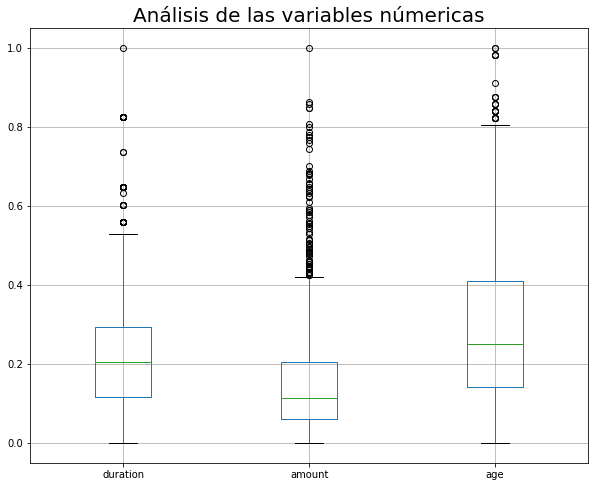

In [70]:
numeric_values=credit[numeric_features]
scaler=MinMaxScaler()
analisis=scaler.fit_transform(numeric_values)
analisis=pd.DataFrame(analisis)
analisis.columns=numeric_features
analisis.boxplot(figsize=(10,8))
plt.title("Análisis de las variables númericas",fontsize=20)


4. Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de
aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás
llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda
aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las
siguientes características:
  
  a. Usa los parámetros predeterminados de cada modelo.
  
  b. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision,
recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes
definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn.
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix()
de scikit-learn para definir las métricas).
 
  c. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.
 
  d. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como
para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la
métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu
respuesta.
 
  e. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de
estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:
   
    i. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del desempeño de dicha función “learning_curve()”.
   
    ii. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.
   
    iii. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.

In [71]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression())
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  # RF . Bosque Aleatorio
  modelos.append(RandomForestClassifier())
  nombres.append('RF')

  return modelos, nombres


In [72]:
def mi_accuracy(yreal,ypred):
  VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
  accuracy=(VN+VP)/(VN+FP+FN+VP)
  return accuracy

def mi_precision(yreal,ypred):
  VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
  precision=(VP)/(VP+FP)
  return precision

def mi_recall(yreal,ypred):
  VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
  recall=(VP)/(VP+FN)
  return recall

def mi_f1score(yreal,ypred):
    VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
    recall=(VP)/(VP+FN)
    precision=(VP)/(VP+FP)
    f1score=(2*recall*precision)/(precision+recall)

def mi_gmean(yreal,ypred):
    VN,FP,FN,VP=confusion_matrix(yreal,ypred).flatten()
    recall=(VP)/(VP+FN)
    specifity=(VN)/(VN+FP)
    gmean=np.sqrt(recall*specifity)
